In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Check the lecture notebook for more details

In [175]:
import statsmodels.api as sm

In [176]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [177]:
# NON-STATIONARY DATASET

df1 = pd.read_csv("airline_passengers.csv" , index_col = "Month" , 
                  parse_dates = True)

df1.index.freq = 'MS'

In [178]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [179]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [180]:
# STATIONARY DATASET

df2 = pd.read_csv("DailyTotalFemaleBirths.csv" , index_col = "Date" , 
                  parse_dates = True)

df2.index.freq = 'D'

In [181]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [182]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
# Example 1 : 
df = pd.DataFrame({'a' : [13,5,11,12,9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [185]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [186]:
# nlags = n-1  (n : number of rows) 
# Number of lags to return autocorrelation for.

pacf_yw(df['a'] , nlags = 4 , method = 'mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [187]:
pacf_yw(df['a'] , nlags = 4 , method = 'adjusted')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [188]:
pacf_ols(df['a'] , nlags =4 )

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### plotting

In [189]:
from pandas.plotting import lag_plot

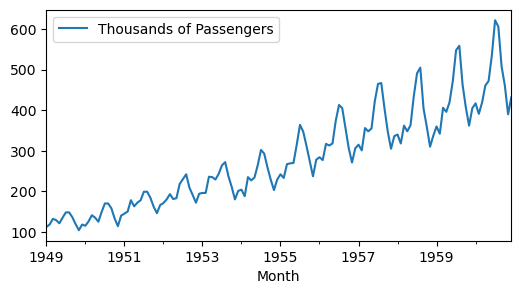

In [190]:
df1.plot(figsize = (6,3))

plt.show()

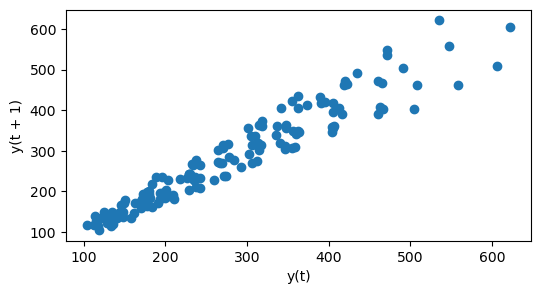

In [191]:
plt.rc("figure", figsize=(6,3))
lag_plot(df1['Thousands of Passengers'])
plt.show()

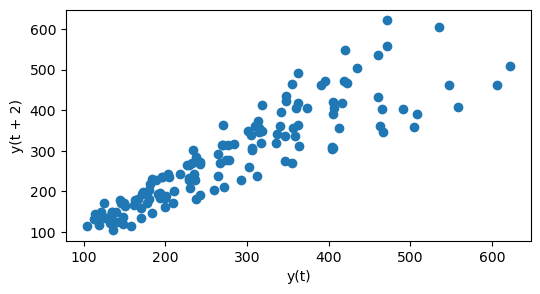

In [192]:
plt.rc("figure", figsize=(6,3))
lag_plot(df1['Thousands of Passengers'], lag = 2 ,)
plt.show()

In [193]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


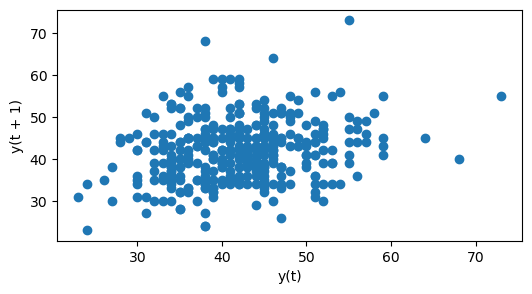

In [194]:
plt.rc("figure", figsize=(6,3))
lag_plot(df2['Births'])
plt.show()

In [195]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

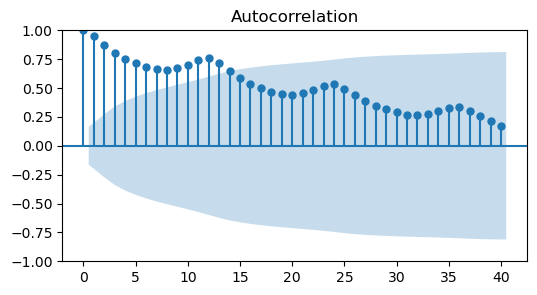

In [196]:
# Non-stationary dataset
plt.rc("figure", figsize=(6,3))
plot_acf(df1 , lags = 40 , ) ;

# shaded region  : confidence interval (bydefault = 95%)
# correlation outside shaded region is more likely to occur

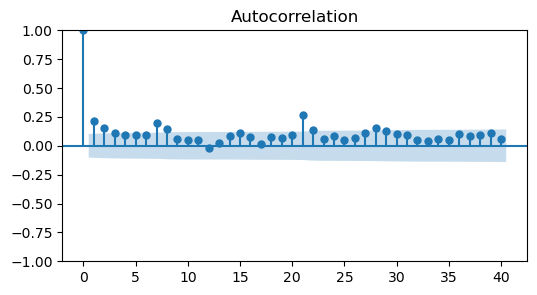

In [197]:
# Stationary dataset

plt.rc("figure", figsize=(6,3))
plot_acf(df2,lags =40)

plt.show()

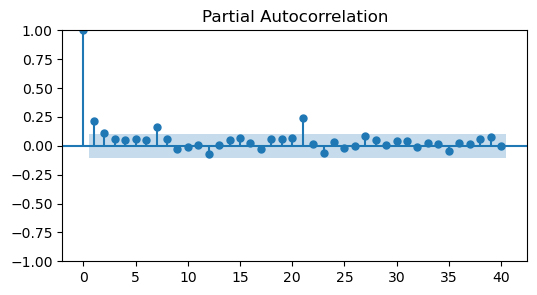

In [198]:
# Non stationary dataset

plt.rc("figure", figsize=(6,3))
plot_pacf(df2,lags = 40 )
plt.show()